In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report

In [72]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
len(df[df.duplicated()])

0

In [78]:
df.where(df["Pregnancies"] <= 0.0).value_counts().sum()

111

In [79]:
df.where(df["Glucose"] <= 0.0).value_counts().sum()

5

In [80]:
df.where(df["BloodPressure"] <= 0.0).value_counts().sum()

35

In [81]:
df.where(df["SkinThickness"] <= 0.0).value_counts().sum()

227

In [82]:
df.where(df["Insulin"] <= 0.0).value_counts().sum()

374

In [83]:
df.where(df["BMI"] <= 0.0).value_counts().sum()

11

In [84]:
df.where(df["DiabetesPedigreeFunction"] <= 0.0).value_counts().sum()

0

In [85]:
df.where(df["Age"] <= 0.0).value_counts().sum()

0

**We must define 0 values as NaN**

In [86]:
df[["Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [89]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [38]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [39]:
df = df.fillna(df.mean())

In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
len(df[df.duplicated()])

0

In [53]:
copiedData = df.copy()

In [55]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
clf.fit_predict(copiedData)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [57]:
score = clf.negative_outlier_factor_
sortedscore = np.sort(score)
sortedscore

array([-2.82507058, -2.59693313, -2.36809098, -2.00714249, -1.99003552,
       -1.84952447, -1.81086155, -1.79099222, -1.77564168, -1.68052893,
       -1.66590066, -1.64335596, -1.6319083 , -1.58678404, -1.57603856,
       -1.57092941, -1.56686416, -1.56329374, -1.54964059, -1.54627944,
       -1.5293677 , -1.51892357, -1.51880797, -1.51856755, -1.48508221,
       -1.47949589, -1.47941709, -1.4783981 , -1.47456427, -1.46753838,
       -1.46266803, -1.45619184, -1.45514619, -1.45464433, -1.44840208,
       -1.44745781, -1.44284666, -1.44096174, -1.43783312, -1.4327936 ,
       -1.43266091, -1.43084081, -1.42806197, -1.41676953, -1.4018946 ,
       -1.39455071, -1.38968007, -1.38474247, -1.37934427, -1.37791181,
       -1.37563987, -1.37503512, -1.37408119, -1.37208872, -1.36965645,
       -1.36357949, -1.35883911, -1.35823642, -1.35745178, -1.35691733,
       -1.3566479 , -1.35604762, -1.34898703, -1.34886595, -1.34730538,
       -1.34289473, -1.34138188, -1.34128616, -1.33947055, -1.33

In [59]:
point = sortedscore[5]
print(point)
copiedData[score == point]

-1.8495244747217812


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [62]:
outliers = copiedData < point
copiedData[outliers].value_counts().sum()

0

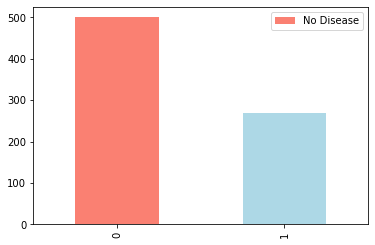

In [45]:
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.legend(["No Disease", "Disease"]);

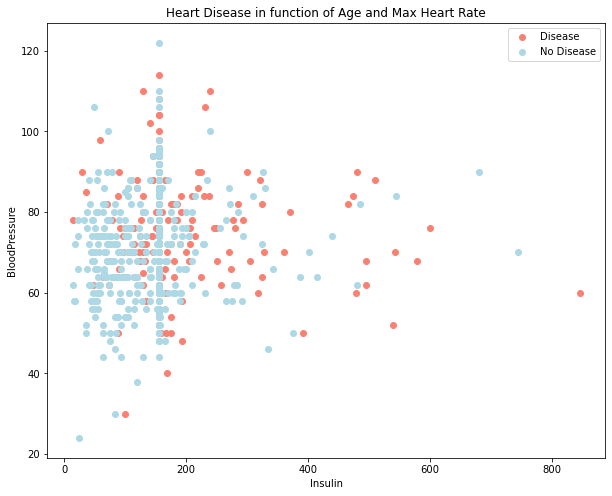

In [63]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.Insulin[df.Outcome==1],
            df.BloodPressure[df.Outcome==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Insulin[df.Outcome==0],
            df.BloodPressure[df.Outcome==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Insulin")
plt.ylabel("BloodPressure")
plt.legend(["Disease", "No Disease"]);

<AxesSubplot:>

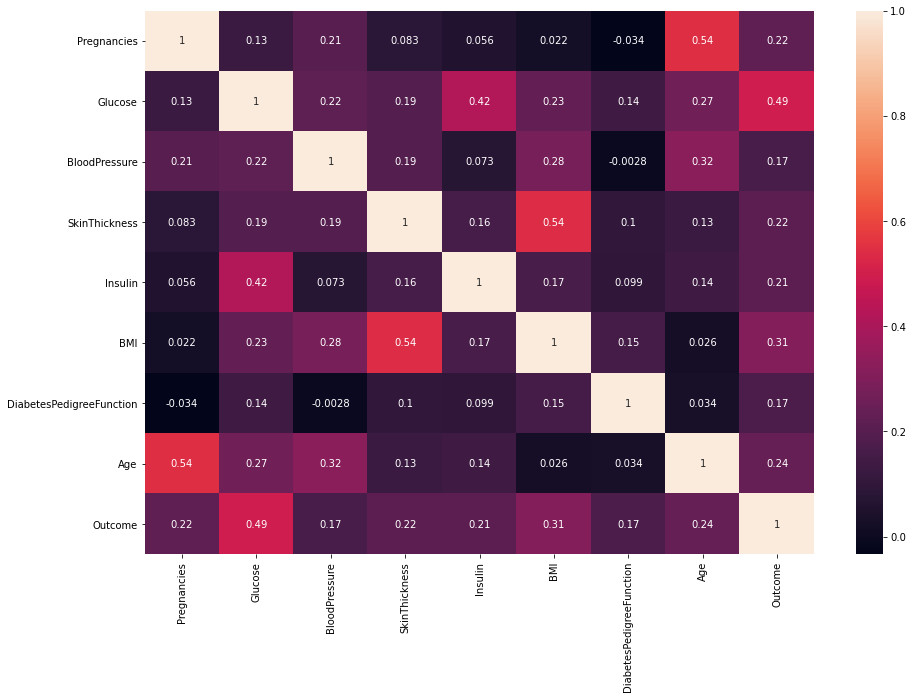

In [47]:
# Let's make our correlation matrix (pearson correlation)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

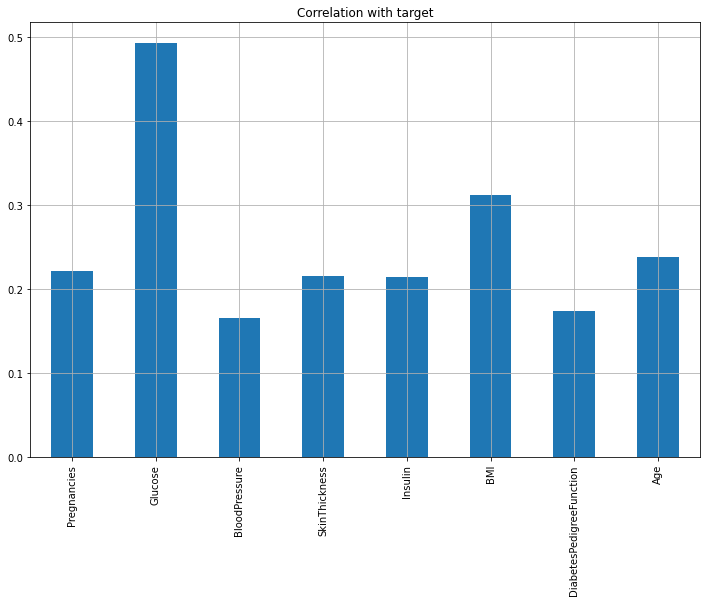

In [48]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [50]:
pca_model = PCA(n_components = 4)
pca_data_standard = pca_model.fit_transform(X_standard)
pca_data_standard

array([[ 1.50362957, -0.5880889 ,  0.19627683,  0.57034423],
       [-1.43751319,  0.07698799, -0.10115985, -0.19289641],
       [ 0.49223335, -0.8125685 ,  1.65337386,  0.46043763],
       ...,
       [-0.9191384 , -0.95161087,  0.0501147 , -0.37899524],
       [-0.31700403, -0.23101492,  0.50960441, -0.19648233],
       [-1.18028819,  0.68885145, -0.40574496, -0.50094145]])

In [65]:
dataset = pd.DataFrame(data = pca_data_standard, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
dataset['Outcome'] = y
dataset.tail()

,PC1,PC2,PC3,PC4,Outcome
763,2.208263,-1.821847,-1.412665,-0.149259,0
764,-0.355983,0.686105,-0.130299,-0.520159,0
765,-0.919138,-0.951611,0.050115,-0.378995,0
766,-0.317004,-0.231015,0.509604,-0.196482,1
767,-1.180288,0.688851,-0.405745,-0.500941,0


In [67]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome', axis=1)
y = dataset.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  71.42857142857143
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       151
           1       0.58      0.66      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231



In [68]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  69.6969696969697
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       151
           1       0.56      0.62      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231



In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train, y_train)
pred = rfc_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  71.86147186147186
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

